<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/2-Rheology/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/main/2-Rheology/CSVP-of-Lotions-and-Creams-names-removed.webp?raw=1)

What conclusions would you get from that about the behaviour of day creams in front of body creams?

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


In [8]:
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
sp.init_printing()
from IPython.display import display, Math
Deltap,L,r,n,R, sig, eta,gamma,K= sp.symbols('{\Delta}p L r n R sigma eta gamma K',positive=True)
uz = sp.Function('u_z')

eq1 = sp.Eq(eta,sig/gamma)
eq2 = sp.Eq(sig,K*gamma**n)

Eq1= sp.solve([eq1],[gamma])
Eq = eq2.subs(gamma,Eq1[gamma])

Eq= sp.solve([Eq],[sig])

expression = sp.Eq(sig,Eq[0][0])

display(expression)

# Eq = sp.Eq(sp.log(sig),sp.log(eta*(1/(2*eta)*(Deltap/L)*r)**(1/(n-1))))
# display(Eq)


exprLog = sp.Eq(sp.log(expression.lhs),sp.log(expression.rhs))
exprLog = exprLog.expand(force=True)
display(exprLog)

A,B = sp.symbols('A B',positive=True)

Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

logExpr = sp.Eq(sp.log(sig), A*(sp.log(eta)) + B)

display(logExpr)

      -1      n  
     ─────  ─────
     n - 1  n - 1
σ = K     ⋅η     

         n⋅log(η)   log(K)
log(σ) = ──────── - ──────
          n - 1     n - 1 

log(σ) = A⋅log(η) + B

In [9]:
DataFrame = pd.read_csv("Default Dataset (1).csv",header=None,names=['x','y'], delimiter=";", decimal=",")


model = smf.ols('np.log(y) ~ np.log(x)', DataFrame)  # 1. Define model of regression
result = model.fit()                   # 2. Adjust model of the data
result.summary()


display(result.params)

,0
Intercept,11.751671
np.log(x),-2.617894


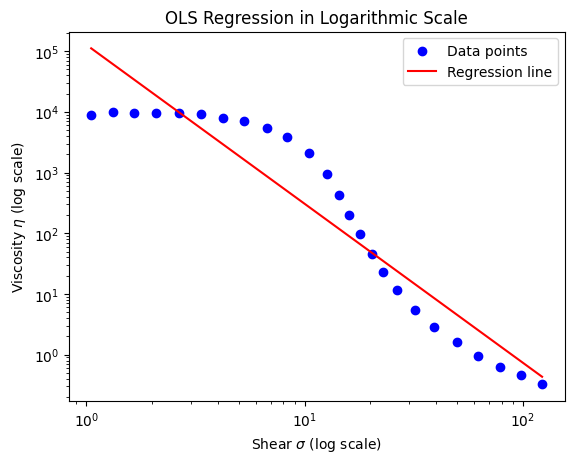

In [10]:
intercept = result.params['Intercept']
slope = result.params['np.log(x)']

# Create a range of x values (log-transformed) for plotting the regression line in logarithmic space
x_vals = DataFrame['x']  # Use the original x values for plotting the regression line in the original scale

# Compute the y-values for the regression line in logarithmic space
y_vals_log = intercept + slope * np.log(x_vals)  # Regression line equation in log scale

# Convert the y-values back to the original scale using np.exp() for the plot
y_vals = np.exp(y_vals_log)

# Plot the data points (log-transformed)
plt.scatter(DataFrame['x'], DataFrame['y'], color='blue', label='Data points')

# Plot the regression line (on the original scale)
plt.plot(x_vals, y_vals, color='red', label='Regression line')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('Shear $\sigma$ (log scale)')
plt.ylabel('Viscosity $\eta$ (log scale)')
plt.title('OLS Regression in Logarithmic Scale')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [11]:
Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

nVal = sp.solve(sp.Eq(Aeq , slope),n)
Beq = Beq.subs(n,nVal[0])
KVal = sp.solve(sp.Eq(Beq , intercept),K)

Aeq = Aeq.subs({n:nVal[0], K: KVal[0]})
Beq = Beq.subs({n:nVal[0], K: KVal[0]})

LinearModel = logExpr.subs({A:Aeq, B: Beq})
display(nVal)
display(KVal)

display(LinearModel)


[0.723596111532329]

[25.7441510619581]

log(σ) = 11.7516706298573 - 2.61789410975295⋅log(η)

Now we define the Carreau model

In [12]:
eta, etaInf, eta0, lam,gamma, n= sp.symbols('eta \eta_{inf} eta_0 lambda gamma n',positive=True)

eq1 = sp.Eq(eta, etaInf + (eta0-etaInf)*(1+(lam*gamma)**2)**((n-1)/2))
display(eq1)

eq2 = sp.Eq(sig,K*gamma**n)
display(eq2)
eq2r = sp.solve(eq2,gamma)
display(eq2r)
eq2n = sp.Eq(gamma,eq2r[0])
display(eq2n)

subs = eq1.subs(gamma,eq2r[0])
Eq =subs
display(Eq)




# exprLog = sp.Eq(sp.log(Eq.lhs),sp.log(Eq.rhs))
# exprLog = exprLog.expand(force=True)
# exprLog = sp.simplify(exprLog)

# display(exprLog)


                                               n   1
                                               ─ - ─
                                               2   2
                                    ⎛ 2  2    ⎞     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎝γ ⋅λ  + 1⎠     

       n
σ = K⋅γ 

⎡    ___⎤
⎢   ╱ σ ⎥
⎢n ╱  ─ ⎥
⎣╲╱   K ⎦

        ___
       ╱ σ 
γ = n ╱  ─ 
    ╲╱   K 

                                                 n   1
                                                 ─ - ─
                                                 2   2
                                    ⎛      2    ⎞     
                                    ⎜      ─    ⎟     
                                    ⎜      n    ⎟     
                                    ⎜ 2 ⎛σ⎞     ⎟     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎜λ ⋅⎜─⎟  + 1⎟     
                                    ⎝   ⎝K⎠     ⎠     

0.7235961115323285

25.744151061958107

Optimal parameters:
  η₀ = 9357.106120984938
  η∞ = 0.3
  λ  = 150.0
  n  = 0.19
  K  = 15.0


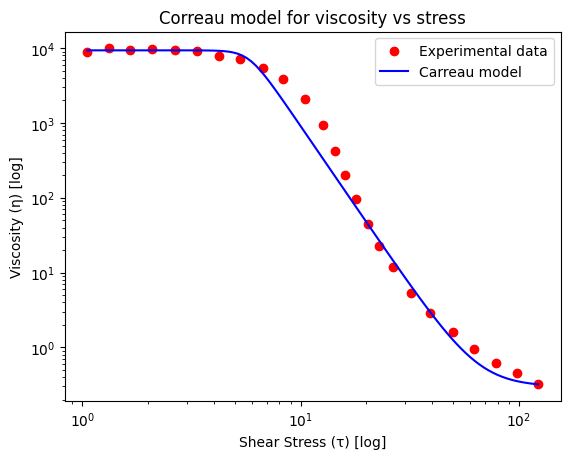

In [33]:
import scipy.optimize as opt
n1 = float(nVal[0])
k1 = float(KVal[0])
display(n1)
display(k1)


def carreau_viscosity(tau, eta0, etainf, lambda_, n,k):
  eta_tau = etainf + (eta0-etainf)*(1+lambda_**2*(tau/k)**(2/n))**((n-1)/2)
  return eta_tau


etaexp = DataFrame['y'].to_numpy()
tauexp = DataFrame['x'].to_numpy()


p0 =[9300,0.3,100,0.01,5]# float(nVal[0]),float(KVal[0])]


bounds = (
    [7000, 0, 0, 0, 0],  # Min value for parameters
    [10000, 0.3, 150, 0.2, 25]  # Max value for parameters
)

popt, pcov = opt.curve_fit(carreau_viscosity, tauexp, etaexp, p0, bounds = bounds, maxfev=10000)


# popt[0] = 9357.106120984938
# popt[1] = 0.3
# popt[2] = 150
# popt[3] = 0.19
# popt[4] = 15

# # Define the MSE loss function
# def compute_mse(params, tauexp, etaexp):
#     eta0, etainf, lambda_, n, k = params
#     eta_pred = carreau_viscosity(tauexp, eta0, etainf, lambda_, n, k)
#     mse = np.mean((eta_pred - etaexp) ** 2)
#     return mse

# # Compute numerical gradients
# def compute_gradients(params, tauexp, etaexp, epsilon=1e-5):
#     gradients = np.zeros(len(params))
#     for i in range(len(params)):
#         params_step = params.copy()
#         params_step[i] += epsilon
#         mse1 = compute_mse(params_step, tauexp, etaexp)

#         params_step[i] -= 2 * epsilon
#         mse2 = compute_mse(params_step, tauexp, etaexp)

#         gradients[i] = (mse1 - mse2) / (2 * epsilon)  # Central difference approximation
#     return gradients

# # Gradient Descent Optimization
# def gradient_descent(tauexp, etaexp, initial_params, learning_rate=1e-12, max_iters=1000, tolerance=1e-6):
#     params = np.array(initial_params, dtype=float)
#     mse_history = []

#     for i in range(max_iters):
#         mse = compute_mse(params, tauexp, etaexp)
#         mse_history.append(mse)

#         gradients = compute_gradients(params, tauexp, etaexp)

#         # Update parameters
#         params -= learning_rate * gradients

#         # Stopping condition
#         if np.linalg.norm(gradients) < tolerance:
#             print(f"Converged at iteration {i+1}")
#             break

#     return params, mse_history

# initial_params = [9357.1, 0.3, 150.0, 0.19, 15.9]
# initial_params = popt
# optimized_params, mse_history = gradient_descent(tauexp, etaexp, initial_params)
# optimized_params = popt

# p0 = [max(etaexp),min(etaexp),20,float(nVal[0]),float(KVal[0])]

# bounds = (
#     [1e-3, 0, 0, 0, 0],  # Valores mínimos para cada parámetro
#     [np.inf, 1, np.inf, 1, np.inf]  # Valores máximos razonables
# )

# popt, pcov = opt.curve_fit(carreau_viscosity, tauexp, etaexp, p0, bounds = bounds, maxfev=10000)
# eta0_fit, etainf_fit, lambda_fit, n_fit, K_fit = popt


eta0_fit, etainf_fit, lambda_fit, n_fit, K_fit = optimized_params
print(f"Optimal parameters:")
print(f"  η₀ = {eta0_fit}")
print(f"  η∞ = {etainf_fit}")
print(f"  λ  = {lambda_fit}")
print(f"  n  = {n_fit}")
print(f"  K  = {K_fit}")

tau_fit = np.logspace(np.log10(min(tauexp)), np.log10(max(tauexp)), 100)
eta_fit = carreau_viscosity(tau_fit, *optimized_params)

plt.scatter(tauexp, etaexp, label="Experimental data", color="red")
plt.plot(tau_fit, eta_fit, label="Carreau model", color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear Stress (τ) [log]")
plt.ylabel("Viscosity (η) [log]")
plt.legend()
plt.title("Correau model for viscosity vs stress")
plt.show()

In [14]:
eta, etaInf, eta0, lam,gamma, n= sp.symbols('eta \eta_{inf} eta_0 lambda gamma n',positive=True)

eq2 = sp.Eq(eta, etaInf + (eta0-etaInf)*(1+(lam*gamma)**2)**((n-1)/2))
display(eq1)

eq1 = sp.Eq(sig,K*gamma**n)
display(eq2)
eq2r = sp.solve(eq2,gamma)
display(eq2r)
eq2n = sp.Eq(gamma,eq2r[0])
display(eq2n)

subs = eq1.subs(gamma,eq2r[0])
Eq =subs
display(Eq)




# exprLog = sp.Eq(sp.log(Eq.lhs),sp.log(Eq.rhs))
# exprLog = exprLog.expand(force=True)
# exprLog = sp.simplify(exprLog)

# display(exprLog)

                                               n   1
                                               ─ - ─
                                               2   2
                                    ⎛ 2  2    ⎞     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎝γ ⋅λ  + 1⎠     

                                               n   1
                                               ─ - ─
                                               2   2
                                    ⎛ 2  2    ⎞     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎝γ ⋅λ  + 1⎠     

⎡        ____________________________          ____________________________⎤
⎢       ╱                    2                ╱                    2       ⎥
⎢      ╱                   ─────             ╱                   ─────     ⎥
⎢     ╱                    n - 1            ╱                    n - 1     ⎥
⎢    ╱    ⎛\eta_{inf} - η ⎞                ╱    ⎛\eta_{inf} - η ⎞          ⎥
⎢-  ╱     ⎜───────────────⎟      - 1      ╱     ⎜───────────────⎟      - 1 ⎥
⎢ ╲╱      ⎝\eta_{inf} - η₀⎠             ╲╱      ⎝\eta_{inf} - η₀⎠          ⎥
⎢─────────────────────────────────────, ───────────────────────────────────⎥
⎣                  λ                                     λ                 ⎦

            ____________________________ 
           ╱                    2        
          ╱                   ─────      
         ╱                    n - 1      
        ╱    ⎛\eta_{inf} - η ⎞           
    -  ╱     ⎜───────────────⎟      - 1  
     ╲╱      ⎝\eta_{inf} - η₀⎠           
γ = ─────────────────────────────────────
                      λ                  

                                             n
      ⎛        ____________________________ ⎞ 
      ⎜       ╱                    2        ⎟ 
      ⎜      ╱                   ─────      ⎟ 
      ⎜     ╱                    n - 1      ⎟ 
      ⎜    ╱    ⎛\eta_{inf} - η ⎞           ⎟ 
      ⎜-  ╱     ⎜───────────────⎟      - 1  ⎟ 
      ⎜ ╲╱      ⎝\eta_{inf} - η₀⎠           ⎟ 
σ = K⋅⎜─────────────────────────────────────⎟ 
      ⎝                  λ                  ⎠ 

In [28]:
import scipy.optimize as opt
n1 = float(nVal[0])
k1 = float(KVal[0])
display(n1)
display(k1)


def carreau_viscosity(eta, eta0, etainf, lambda_, n,k):
  sigma = K*(-(np.sqrt((etainf-eta)/(etainf-eta0))**(2/(n-1))-1)/lambda_)**n
  return sigma


etaexp = DataFrame['y'].to_numpy()
tauexp = DataFrame['x'].to_numpy()


p0 =[max(etaexp),min(etaexp),20,float(nVal[0]),float(KVal[0])]# float(nVal[0]),float(KVal[0])]


bounds = (
    [1e-3, 0, 0, 0, 0],  # Min value for parameters
    [np.inf, 1, np.inf, 1, np.inf]  # Max value for parameters
)

popt, pcov = opt.curve_fit(carreau_viscosity, etaexp, tauexp, p0, bounds = bounds, maxfev=10000)

# initial_params = [9357.1, 0.3, 150.0, 0.19, 15.9]
# optimized_params, mse_history = gradient_descent(tauexp, etaexp, initial_params)


# p0 = [max(etaexp),min(etaexp),20,float(nVal[0]),float(KVal[0])]

# bounds = (
#     [1e-3, 0, 0, 0, 0],  # Valores mínimos para cada parámetro
#     [np.inf, 1, np.inf, 1, np.inf]  # Valores máximos razonables
# )

# popt, pcov = opt.curve_fit(carreau_viscosity, tauexp, etaexp, p0, bounds = bounds, maxfev=10000)
# eta0_fit, etainf_fit, lambda_fit, n_fit, K_fit = popt


eta0_fit, etainf_fit, lambda_fit, n_fit, K_fit = optimized_params
print(f"Optimal parameters:")
print(f"  η₀ = {eta0_fit}")
print(f"  η∞ = {etainf_fit}")
print(f"  λ  = {lambda_fit}")
print(f"  n  = {n_fit}")
print(f"  K  = {K_fit}")

eta_fit = np.logspace(np.log10(min(tauexp)), np.log10(max(tauexp)), 100)
tau_fit = carreau_viscosity(eta_fit, *optimized_params)

plt.scatter(tauexp, etaexp, label="Experimental data", color="red")
plt.plot(tau_fit, eta_fit, label="Carreau model", color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear Stress (τ) [log]")
plt.ylabel("Viscosity (η) [log]")
plt.legend()
plt.title("Correau model for viscosity vs stress")
plt.show()

0.7235961115323285

25.744151061958107

<ipython-input-28-15259da3a5c3>:9: RuntimeWarning: divide by zero encountered in power
  sigma = K*(-(np.sqrt((etainf-eta)/(etainf-eta0))**(2/(n-1))-1)/lambda_)**n
<ipython-input-28-15259da3a5c3>:9: RuntimeWarning: invalid value encountered in power
  sigma = K*(-(np.sqrt((etainf-eta)/(etainf-eta0))**(2/(n-1))-1)/lambda_)**n
<ipython-input-28-15259da3a5c3>:9: RuntimeWarning: invalid value encountered in multiply
  sigma = K*(-(np.sqrt((etainf-eta)/(etainf-eta0))**(2/(n-1))-1)/lambda_)**n


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''